# Decision Tree Regression Model

## Import Libaries

In [9]:
import pandas as pd
import numpy as np

#build the model, import decision tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#get error metrics to evaluate model
#from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics

In [4]:
X_train = pd.read_csv('../dataset/no_outliers/X_train.csv')
X_test = pd.read_csv('../dataset/no_outliers/X_test.csv')
y_train = pd.read_csv('../dataset/no_outliers/y_train.csv')
y_test = pd.read_csv('../dataset/no_outliers/y_test.csv')

X_train_with = pd.read_csv('../dataset/with_outliers/X_train.csv')
X_test_with = pd.read_csv('../dataset/with_outliers/X_test.csv')
y_train_with = pd.read_csv('../dataset/with_outliers/y_train.csv')
y_test_with = pd.read_csv('../dataset/with_outliers/y_test.csv')

In [95]:
# To make result more visualise
cols_X = ["temperature","humidity","windspeed"]
for col in cols_X:
    X_train_with = X_train_with.replace(to_replace = X_train_with[col].values, value = (np.round(X_train_with[col].values, 2)), regex = True)
    X_test_with = X_test_with.replace(to_replace = X_test_with[col].values, value = (np.round(X_test_with[col].values, 2)), regex = True)
    X_train = X_train.replace(to_replace = X_train[col].values, value = (np.round(X_train[col].values, 2)), regex = True)
    X_test = X_test.replace(to_replace = X_test[col].values, value = (np.round(X_test[col].values, 2)), regex = True)
    
cols_y = ["count"]
for col in cols_y:
    y_train_with = y_train_with.replace(to_replace = y_train_with[col].values, value = (np.round(y_train_with[col].values/100)*100), regex = True)
    y_test_with = y_test_with.replace(to_replace = y_test_with[col].values, value = (np.round(y_test_with[col].values/100)*100), regex = True)
    y_train = y_train.replace(to_replace = y_train[col].values, value = (np.round(y_train[col].values/100)*100), regex = True)
    y_test = y_test.replace(to_replace = y_test[col].values, value = (np.round(y_test[col].values/100)*100), regex = True)

In [5]:
dt = DecisionTreeRegressor(random_state=42)

### Without Outliers (Mean, R^2)

In [6]:
dt_without = dt.fit(X_train, y_train)

In [7]:
# use model to get prediction
y_pred_dt = dt_without.predict(X_test)
y_pred_dt

array([6784., 8120., 6591., 5409., 5138., 6871., 3403., 1406., 1096.,
       1562., 5099., 5572., 2077., 3613., 4186., 1795., 3958., 4862.,
       4352., 7013., 4595., 2660., 4334., 6691., 5202., 5585., 4553.,
       6889., 1321., 1834., 3820., 4378., 7570., 5515., 6784., 6207.,
       7509., 3598., 3368., 1891., 1815., 4270., 2252., 6889., 4586.,
       5423., 3811., 3747., 2792., 8395., 2659., 7665., 4672., 7665.,
       5342., 6436., 1996., 2493., 7713., 7605., 4978., 6241., 5743.,
        431., 5204., 4073., 2424., 2895., 5342., 6359., 5035., 6544.,
       2927., 3944., 2425., 3717., 1607., 6034., 2311., 4978., 2395.,
       1317., 3644., 7335., 7570., 5728., 7534., 4318.,  683., 2056.,
       7525., 5728., 2935., 6153., 7582., 3830., 6772., 3894., 6889.,
       4862., 3520., 3940., 3542., 7767., 6889., 2311., 7804., 4338.,
       2277., 8362., 1589., 5728., 1746., 7350., 3542., 5478., 6852.,
       1162., 1817., 2808., 5463., 5424., 4352., 1891., 4304., 4548.,
       2927., 1851.,

In [11]:
mean = metrics.mean_absolute_error(y_test, y_pred_dt)
mean2 = metrics.mean_squared_error(y_test, y_pred_dt)
rmean2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
r2 = metrics.r2_score(y_test, y_pred_dt)
coefficient = dt.score(X_test, y_test)

print('Mean Absolute Error:', mean)
print('Mean Squared Error:', mean2)
print('Root Mean Squared Error:', rmean2)
print ('R^2: ',r2)
print ('Coefficient: ', coefficient)

Mean Absolute Error: 591.1793103448276
Mean Squared Error: 584700.6827586207
Root Mean Squared Error: 764.6572322018675
R^2:  0.8603140027702759
Coefficient:  0.8603140027702759


### With Outliers

In [12]:
dt_with = dt.fit(X_train_with, y_train_with)

In [13]:
y_pred_dt_with = dt_without.predict(X_test_with)
y_pred_dt_with

array([4362., 4541., 1927., 1005., 4339., 3570., 4511., 4585., 6235.,
        431., 1605., 2485., 2077., 5302., 4765., 3907., 7767., 7109.,
       3243.,  795., 7605., 1787., 5260., 4835.,  920., 7013., 3846.,
       5204., 6824., 7458.,  986., 5046., 7570., 5084., 2485., 4098.,
       6241., 6207., 2192., 2594., 6296., 1096., 4917., 3761., 7605.,
       6824., 2298., 4338.,  441., 3249., 6591., 6598., 6772., 7363.,
       4940., 3520., 3322., 6852., 6825., 3624., 6296., 4169., 5976.,
       8555., 7702., 4795., 4338., 6192., 6770., 4128., 7030., 6855.,
       3214., 6830., 5312., 7534., 5740., 7040., 3403., 2311., 4845.,
       5532., 4905., 1623., 5409., 7702., 5515., 6093., 4127., 3767.,
        683., 2132., 6241., 6140., 4972., 1834., 2429., 7605., 3840.,
       3624., 4795., 6235., 3228., 7720., 1495., 4845., 7870., 7393.,
       6304., 1446., 2034., 4150., 4795., 1913., 2114., 5305., 4906.,
       4123., 7444., 5558., 1005., 4098., 3117., 3761., 4826., 4661.,
        985., 7442.,

In [14]:
mean_with = metrics.mean_absolute_error(y_test_with, y_pred_dt_with)
mean2_with = metrics.mean_squared_error(y_test_with, y_pred_dt_with)
rmean2_with = np.sqrt(metrics.mean_squared_error(y_test_with, y_pred_dt_with))
r2_with = metrics.r2_score(y_test_with, y_pred_dt_with)
coefficient_with = dt.score(X_test_with, y_test_with)

print ('Mean: ', mean_with)
print('Mean Squared Error:', mean2_with)
print('Root Mean Squared Error:', rmean2_with)
print ('R^2: ',r2_with)
print ('Coefficient: ', coefficient_with)

Mean:  668.8979591836735
Mean Squared Error: 828552.3401360544
Root Mean Squared Error: 910.2485046052284
R^2:  0.8051905674964466
Coefficient:  0.8051905674964466


## View (Maybe can take away)

In [76]:
columns = X_train.columns
columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'weather',
       'temperature', 'humidity', 'windspeed'],
      dtype='object')

In [77]:
importance = dt.feature_importances_
importance

array([0.05592162, 0.28804861, 0.03807861, 0.00102207, 0.01471106,
       0.02183398, 0.48143515, 0.06093112, 0.03801778])

In [58]:
combo = pd.Series(importance, columns)
combo

season         0.055455
year           0.300215
month          0.024453
holiday        0.003882
weekday        0.018878
weather        0.009634
temperature    0.453828
humidity       0.088593
windspeed      0.045063
dtype: float64

In [80]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0.5, 1.0, 'Visualization of decision tree model feature imporances')

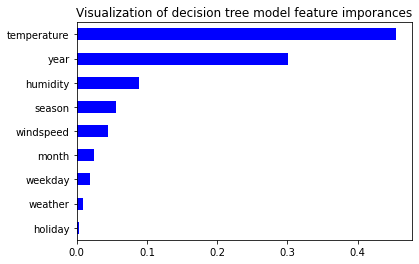

In [82]:
figure(figsize=(6,4))

combo.sort_values().plot.barh(color='blue')
plt.title('Visualization of decision tree model feature imporances')